<a href="https://colab.research.google.com/github/Dimildizio/DS_course/blob/main/Neural_networks/Basic/rosenblatts_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

Here we'll learn how to write a simple Rosenblatt's perceptron - the first neural network ever created.

Let's import some necessary libs first

In [246]:
!wget https://raw.githubusercontent.com/Dimildizio/DS_course/main/Neural_networks/Basic/data/apples_pears.csv

--2023-04-22 19:12:44--  https://raw.githubusercontent.com/Dimildizio/DS_course/main/Neural_networks/Basic/data/apples_pears.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42590 (42K) [text/plain]
Saving to: ‘apples_pears.csv.3’

apples_pears.csv.3  100%[===================>]  41.59K  --.-KB/s    in 0.001s  

2023-04-22 19:12:44 (27.9 MB/s) - ‘apples_pears.csv.3’ saved [42590/42590]



In [247]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score,f1_score, recall_score,precision_score
from sklearn.model_selection import train_test_split


In [248]:
df = pd.read_csv("apples_pears.csv")

Let's define a **Loss function**. Let it be **MSE**. We divide by 2 since $Δ{x^2} = 2x$ and it just makes the computations faster by cancelling 2s when updating the weights. 

$$\frac{1}{2n}\sum_{i=1}^{n} (f(w \cdot X_i + b) - y_i)^2$$  

In [249]:
def Loss(y_pred, y):
  '''mse'''
  return 1/2 * np.mean(y_pred - y)**2

In [250]:
a = np.array([[10,20,30],[21,22,23],[23,24,25]])
b = a*2.5
Loss(b, a)

544.5

## Some visualization

We need functions to take a loot at loss func over epochs, plot the result of classification and plot metrics

In [251]:
def plot_ap(df:pd.DataFrame, target:pd.Series)->None:
  plt.scatter(df['yellowness'], df['symmetry'], c=target)
  plt.title('Apples and pears')
  plt.xlabel('Symmetry')
  plt.ylabel('Yellowness')
  plt.show()

In [252]:
def plot_loss(losses:list)->None:
  """plot loss value by epoch"""
  plt.plot(losses)
  plt.title('Loss function')
  plt.xlabel('Epoch')
  plt.ylabel('Loss value')
  plt.show()

In [253]:
def print_score(y:pd.Series, y_pred:np.ndarray, name:str = 'Train')-> None:
  '''prints statistics for classification model'''
  print('print stats')
  print(name+' accuracy: ', accuracy_score(y, y_pred > 0.2))
  print(name+' F measure: ', f1_score(y, y_pred > 0.2))
  print(name+' ROC-AUC: ', roc_auc_score(y, y_pred))
  print()

## Perceptron class

We need functions that predict by applying WnB to the data (forward), that updats weigths while training (backward), activation function, training function and the one that predicts new data and prints some statistics.

In [254]:
class MyPerceptron:
  def __init__(self, w=None, b=0):
    self.w = w
    self.b = b

  def init_wnb(self, x:int)->None:
    '''zeroes weights and biases'''
    self.w = np.zeros((x, 1))
    self.b = 0

  def activate(self, n:pd.DataFrame)->np.array:
    '''threshold activation function returns 1 if n > 0 else 0'''
    return np.array(n > 0, dtype = np.int32)

  def forward(self, X:pd.DataFrame):
    '''predicting function that multiplies w*X +b and activates the neuron'''
    return self.activate(X @ self.w + self.b)

  def backward(self, X:pd.DataFrame, y:np.ndarray, y_pred:np.ndarray, lr:int = 5e-3):
    '''update the weights using gradient descent'''
    self.w = self.w - (X.T @ (y_pred - y) /len(y)) * lr
    self.b = self.b - np.mean(y_pred-y) * lr

  def fit(self, X:pd.DataFrame, y:pd.Series, n_epochs:int=300)->list:
    '''train the model'''
    losses = []
    self.init_wnb(X.shape[1])
    y = y.values.reshape((-1,1))
    #backpropogation
    for n in range(n_epochs):
      y_pred = self.forward(X)
      losses.append(Loss(y_pred, y))
      self.backward(X, y, y_pred)
    return losses

  def run(self, X:pd.DataFrame, y:pd.Series) ->None:
    '''predisct and show statistics'''
    y_pred = self.forward(X)
    print_score(y, y_pred)
    plot_ap(X, y_pred)

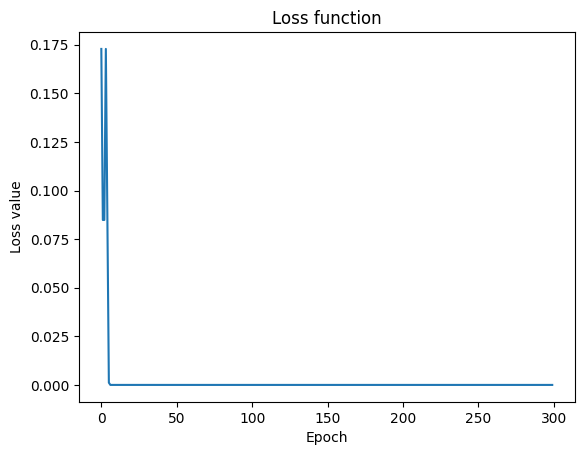

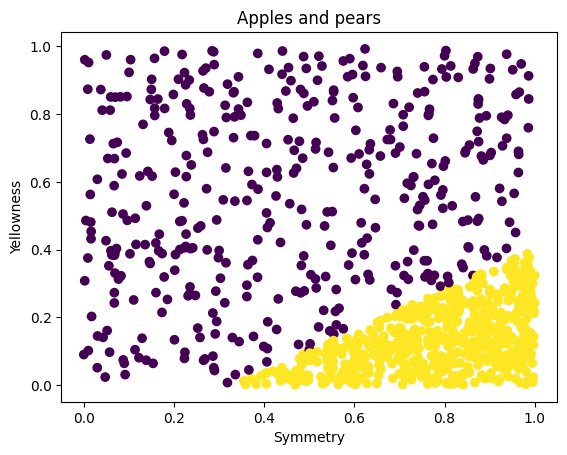

In [255]:
X = df[['yellowness', 'symmetry']]
y = df['target']

perceptron = MyPerceptron()
losses = perceptron.fit(X, y)
y_pred = perceptron.forward(df[['yellowness', 'symmetry']])
plot_loss(losses)
plot_ap(df, y_pred)

In [256]:
X_train, X_test, y_train, y_test = train_test_split(df[['yellowness', 'symmetry']], df['target'], test_size = 0.3, stratify = df['target'], random_state=42)

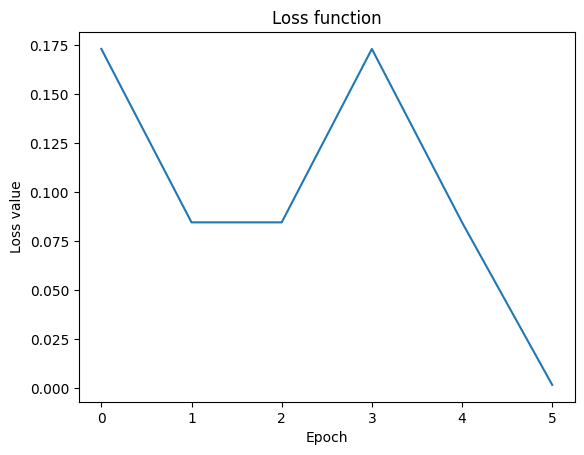

In [257]:
perc_new = MyPerceptron()
losses_new = perc_new.fit(X_train, y_train, n_epochs = 6)
plot_loss(losses_new)

print stats
Train accuracy:  1.0
Train F measure:  1.0
Train ROC-AUC:  1.0



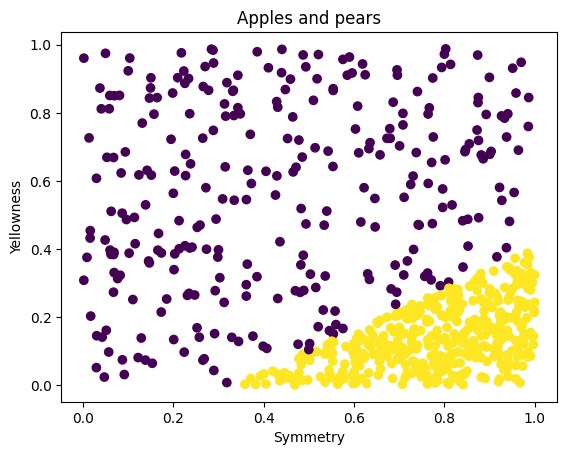

print stats
Train accuracy:  0.9966666666666667
Train F measure:  0.9971509971509972
Train ROC-AUC:  0.9971590909090908



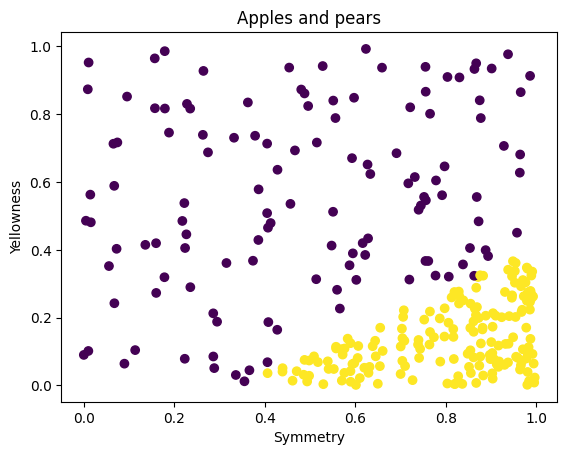

In [258]:
perc_new.run(X_train, y_train)
perc_new.run(X_test, y_test)